Kimberly Devi Milner

EE Independent Study w/  Prof. Fraida Fund

Oct. 28 2016
# Presentation 2: Background and Demo for Blog_1

This is the first of three blog about Cognitive Radios and Machine Learning. Here we will examine two-techniques -- the Second-and-Fourth-Moments (M2M4) and the Signal-to-Variation-Ratio (SVR) -- to estimate a signal's Signal-to-Noise Ratio (SNR).

These estimators provide more insight into the non-random characteristics of a radio signal than energy detection would alone.  

In this Background section, we will show intuition for the M2M4 and SVR estimators through detailing the estimators' performance on both Q-PSK and random signals. 


**ATTRIBUTION:** Images and references from https://ctvrie.files.wordpress.com/2013/07/cograd_commtheory_2013.pdf

## What is a cognitive radio?
A cognitive radio is a radio that is aware of its environemnt. 

Cognitive radios (CR) can dynamically and autonomously adjust radio parameters to interact with the environment around it. In this way CRs can decide the optimal carrier frequency and bandwidth to guide the signal to its end to end communication. 

## Why do we need cognitive radios?
CISCO foresees a x1000 increase in wireless traffic by 2020. The licensed and unlicensed spectrum cannot grow at this rate. 

Cognitive radios provide several solutions to this dilemma; one including a mechanism to take advantage of spectrum holes -- a point in frequency, time or space -- which is not occupied by any transmission. 

## How  could Cognitive Radios work?

### Spectrum Awareness
The cognitive/secondary radio can learn about its environment by observing characteristics of the primary uers's channel. These characteristics include:
    * Traffic Patterns
    * Signaling Procedures
    * Channel Conditions
    * (parts of) messages sent by the legacy system


### Transmitting the Secondary Signal

There are 3 protocols for the secondary user to transmit signals, which break down into "margin" operations and "help" operations.


##### Image References
> * P/STX = primary/secondary transmitter
> * P/SRX = primary/secondary receiver

$$MARGIN:$$
** Underlaying: ** The secondary user's interference to the licensed user's is not avoided, but controlled. The secondary user's intereference should go below the noise floor.
> The difficulty here is due to the fact that the exact interference situation at the primary receiver is not known.

<img src="interweave_2.png">  

** Interleaving: ** Interference by the secondary user is avoided and the secondary user seeks  opportunistic/orthogonal transmission through spectrum holes.
<img src="underlay.png">

$$HELP:$$
** Overlaying: ** The Cognitive Radio knows much more about the primary system (like what message it is sending) and can possibly retransmit this message. 
<img src="overlay.png"> 




# Blog post 1: Sophisticated Sensing: Beyond Simple Energy Sensing

**REFERENCES:** (chapter 2 of Cognitive Radio Book)

*Biglieri, E., Goldsmith, A.J., Greenstein, L.J., Mandayam, N.B. and Poor, H.V. (2012) ‘Capacity of cognitive radio networks’, in Principles of Cognitive Radio:. Cambridge: Cambridge University Press, pp. 41–101.*


## What is  energy sensing and why is not  sophicticated in determining the presence of a spectrum home?
**Energy sensing**  tries to determine the presence of a spectrum hole by comparing the measured energy of the primary channel against a threshold set for primary-user-presence.

The primary-user-presence "threshold depends on the observed-signal model and hence on the noise variance" (157).
So an error made in the estimation of the noise variance will degrade the performance of an engergy detector.

But as the energy detector cannot discriminate between signal and noise, it is more likely to make errors in estimating noise variance, especially at low SNRs, and perform worse.
 
## What is Signal-to-Noise Ratio (SNR),  also known as channel gain?
$$SNR= \frac{signalPower}{noisePower}$$ 


Channel gain is the amplification or attenuation of a signal on a channel:

Channel gain(H) for channel(S,R)  is: $$Y = HX + Z(noise),$$ where Y is the  signal received.
 
## What are the implications of attenuated channel gain of STX on PRX?
If the channel gain between STX and PRX is attenuated, then potentially STX can transmit at the same time as PRX, as in an underlay system.

## How can we design a more sophisticated estimator of channel gain, to let STX to  transmit at the same time as PRX, as in an underlay system?

We can more accurately determine channel gain by using M2M4 and SVR channel gain estimation techniques.


######################################################################################################
# ABOVE iS POLISHED
# BELOW I'M STILL WORKING ON DEMO

# MY QUESTION: 
## is my understanding of why SNR is useful -- ie its potential for an underlay system --correct?

######################################################################################################


### M2M4

M2M4 derives the second  and fourth moments of  the signal, showing that 
>(1) $$M_2 = S + N$$
>(2) $$M_4 = k_a +S^2 + 4SN + k_wN^2$$

Since you have two equations  and two unknowns, S and N, you can solve for them and find their ratio as :

>(4) $$\frac{\sqrt{2M_2^2 - M_4}}{M_2 - \sqrt{2M_2^2 - M_4}}$$



### SVR 
... more math; will explore in the wiki background
Designed to work for M-array PSK-modulation

**PSK** is phase key shifting, where the phase of different  portions of the signal carry the data

--> one of the prototypinng labs for cognitive radios is WINLAB, and will try to replicate lab 6, without the hoping to show that SNR can be estimated in these two more sophisticated ways.  


In [1]:
#notes: understand M2M4 technique; 

# A demo

The point of this demo is to evaluate the complex SNR for a synthesized wave

In [9]:
%matplotlib inline
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np


# Generate a 2Vrms sine wave 2048HZ signal with known noise 
## Noise is (0.001 (volts^2)) / hertz) sampled at 10kHz
### Code for signal generation from  http://scipy.github.io/devdocs/generated/scipy.signal.welch.html

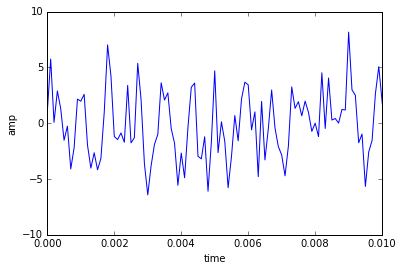

In [10]:
# Generate a signal 
# Note the signal is not M-array PSK

fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)


#Plot signal
plt.ylim([-10,10])
plt.xlim([0, 0.01])
plt.xlabel('time')
plt.ylabel("amp")


plt.plot(time,x)

# Signal Power Spectrum

## The power spectrum of a signal: How much of signal is at frequency $$\omega$$

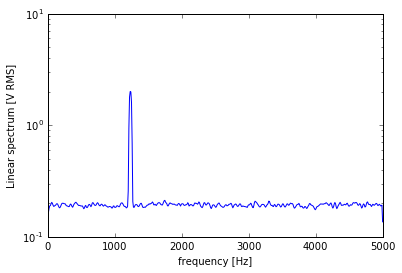

In [11]:
>>> f, Pxx_spec = signal.welch(x, fs, 'flattop', 1024, scaling='spectrum')
>>> plt.figure()
>>> plt.semilogy(f, np.sqrt(Pxx_spec))
>>> plt.xlabel('frequency [Hz]')
>>> plt.ylabel('Linear spectrum [V RMS]')
>>> plt.show()
#>>> np.sqrt(Pxx_spec.max())/noise_power

# But what if is noise power is unknown and you want to estimate the SNR?  

> Two techniques for estimating SNR are presented in the paper: "**A Comparison of SNR Estimation Techniques for the AWGN Channel**"

## Method 1:  M2M4



In [12]:
M2 = np.mean(abs(x)**2)
M4 = np.mean(abs(x)**4)
M2, M4

(9.0356373533840078, 220.84322096108315)

In [13]:
num = (np.sqrt(complex(2*(M2**2) - M4)))

snr = num/ (M2-num)
snr

(-0.41348806257581983+0.49245881521515555j)

## SVR Estimator



In [14]:
signal = x
N = len(signal)
ssum = 0
for i in range(1, N):
    ssum += (abs(signal[i])**2)*(abs(signal[i-1])**2)
savg = (1.0/(float(N)-1.0))*ssum


# Get B
B = savg / (M4 - savg)

# Estimate SNR
snr_2 = B-1 + np.sqrt(complex(B*(B-1)))
snr_2

(-0.40979589640776182+0.49179591264580552j)

# Questions and Going Forward

## Questions:

1. For the background for blog post 1, should I write  up the demo using the synthesized wave above, orth try to use radio waves as done in the FM decoding GENI blog post?

2. How should SNR be calculated in line [38] above? Why is this value not complex?

3. Confirm purpose of blog post 1: instructions on how to set up a radio to detect energy using M2M4 and SVR techniques? ie producct will be a plt btw SNR and SNR_estimateed
